In [138]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

from statsmodels.tools.eval_measures import rmse


#ignore informations warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [101]:
# Read in the given data and set the index column to the date column and parse the dates
df=pd.read_csv("../../02_data_acquisition_understanding/01_data_source/sickness_table.csv", index_col="date", parse_dates=True ) 
df.index.freq="D" #Set the frequence to Daily
df.index

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
               '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08',
               '2016-04-09', '2016-04-10',
               ...
               '2019-05-18', '2019-05-19', '2019-05-20', '2019-05-21',
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27'],
              dtype='datetime64[ns]', name='date', length=1152, freq='D')

In [5]:
for i in range(1,12):
    auto_arima(df['calls'],seasonal=True,m=i).summary()

KeyboardInterrupt: 

In [150]:
auto_arima(df['calls'],seasonal=True,m=365).summary()

MemoryError: 

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "_kalman_smoother.pyx", line 860, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
MemoryError


AttributeError: Memoryview is not initialized

In [139]:
y_train=df.iloc[:len(df)-31]
y_test=df.iloc[len(df)-31:]

In [140]:
model=SARIMAX(df["calls"], order=(2, 1, 2), seasonal_order=(2, 0, 1, 12))

In [141]:
results=model.fit()

In [142]:
start=len(y_train)
end=len(y_train)+ len(y_test)-1

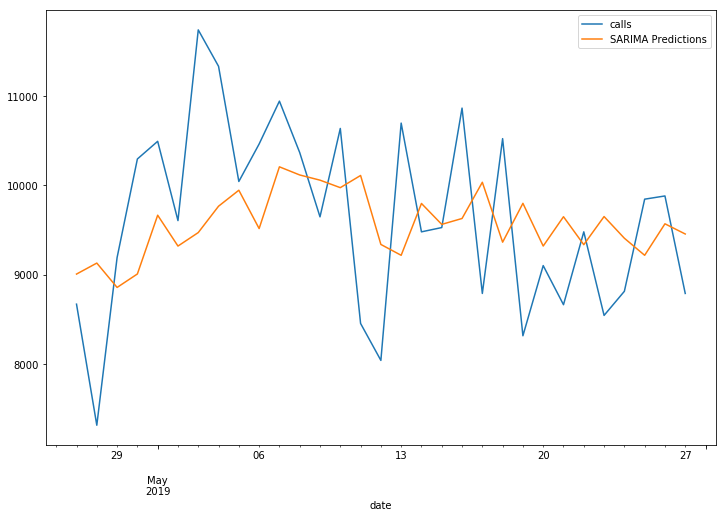

In [143]:
predictions=results.predict(start, end, typ="levels").rename("SARIMA Predictions")
y_test["calls"].plot(legend=True, figsize=(12,8))
predictions.plot(legend=True)

In [145]:
error=rmse(y_test["calls"],predictions)
print(error)

1025.2563578012362


In [135]:
auto_arima(df['calls'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1152
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 7)   Log Likelihood               -9574.608
Date:                           Sun, 21 Nov 2021   AIC                          19167.216
Time:                                   13:09:41   BIC                          19212.651
Sample:                                        0   HQIC                         19184.366
                                          - 1152                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0023      0.036      0.063      0.950      -0.069       0.073
ar.L1          0.3242      0.223      1.452      0.147      -0.114       0.762
ma.L1         -1.0543      0.230     -4.580      0.000      -1.506      -0.603
ma.L2          0.1401      0.196      0.715      0.474      -0.244       0.524
ar.S.L7        0.1633      0.107      1.533      0.125      -0.045       0.372
ar.S.L14       0.8365      0.107      7.848      0.000       0.628       1.045
ma.S.L7       -0.2246      0.126     -1.783      0.075      -0.471       0.022
ma.S.L14      -0.7693      0.126     -6.122      0.000      -1.016      -0.523
sigma2      1.111e+06   1.45e-07   7.68e+12      0.000    1.11e+06    1.11e+06
===================================================================================
Ljung-Box (Q):                       84.71   Jarque-Bera (JB):                13.81
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.18
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.42e+29. Standard errors may be unstable.
"""

In [146]:
model=SARIMAX(df["calls"], order=(1, 1, 2), seasonal_order=(2, 0, 2, 7))
results=model.fit()

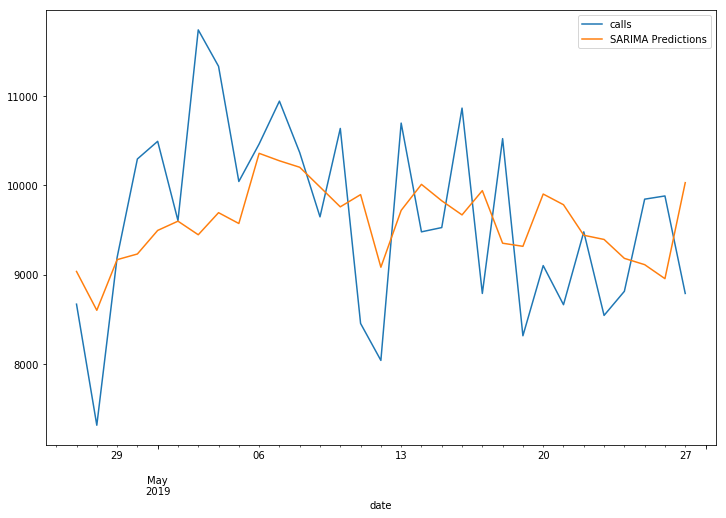

In [147]:
predictions=results.predict(start, end, typ="levels").rename("SARIMA Predictions")
y_test["calls"].plot(legend=True, figsize=(12,8))
predictions.plot(legend=True)

In [149]:
error=rmse(y_test["calls"],predictions)
print(error)

963.658821110615


In [10]:
results=seasonal_decompose(df["calls"], model="add")

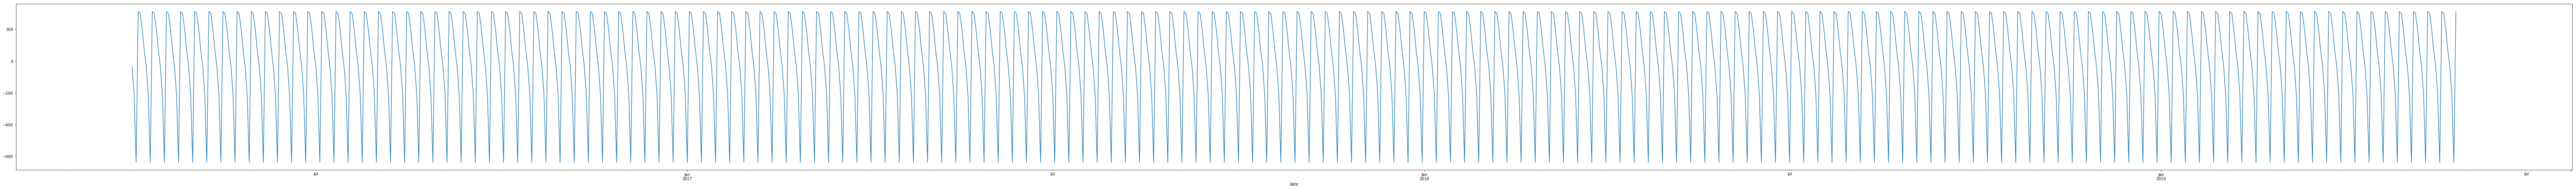

In [17]:
results.seasonal.plot(figsize=(120,8))

In [18]:
results.seasonal

date
2016-04-01    -34.035301
2016-04-02   -212.149504
2016-04-03   -637.308136
2016-04-04    312.846232
2016-04-05    299.685953
2016-04-06    201.328810
2016-04-07     69.631946
2016-04-08    -34.035301
2016-04-09   -212.149504
2016-04-10   -637.308136
2016-04-11    312.846232
2016-04-12    299.685953
2016-04-13    201.328810
2016-04-14     69.631946
2016-04-15    -34.035301
2016-04-16   -212.149504
2016-04-17   -637.308136
2016-04-18    312.846232
2016-04-19    299.685953
2016-04-20    201.328810
2016-04-21     69.631946
2016-04-22    -34.035301
2016-04-23   -212.149504
2016-04-24   -637.308136
2016-04-25    312.846232
2016-04-26    299.685953
2016-04-27    201.328810
2016-04-28     69.631946
2016-04-29    -34.035301
2016-04-30   -212.149504
                 ...    
2019-04-28   -637.308136
2019-04-29    312.846232
2019-04-30    299.685953
2019-05-01    201.328810
2019-05-02     69.631946
2019-05-03    -34.035301
2019-05-04   -212.149504
2019-05-05   -637.308136
2019-05-06    312.84

In [75]:
from tbats import TBATS, BATS

In [76]:
estimator = TBATS(seasonal_periods=(7, 365.25))


In [77]:
y_to_train = df["calls"].iloc[:(len(df["calls"])-31)]
y_to_test = df["calls"].iloc[(len(df["calls"])-31):] # last year for testing

In [78]:
model = estimator.fit(y_to_train)

In [89]:
y_forecast = model.forecast(steps=31)


In [90]:
y_to_train.tail()

,calls
date,
2019-04-22,8058.0
2019-04-23,10218.0
2019-04-24,10692.0
2019-04-25,8862.0
2019-04-26,8532.0


In [92]:
rng = pd.date_range('2019-04-27', periods=31, freq='D')
rng

DatetimeIndex(['2019-04-27', '2019-04-28', '2019-04-29', '2019-04-30',
               '2019-05-01', '2019-05-02', '2019-05-03', '2019-05-04',
               '2019-05-05', '2019-05-06', '2019-05-07', '2019-05-08',
               '2019-05-09', '2019-05-10', '2019-05-11', '2019-05-12',
               '2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16',
               '2019-05-17', '2019-05-18', '2019-05-19', '2019-05-20',
               '2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24',
               '2019-05-25', '2019-05-26', '2019-05-27'],
              dtype='datetime64[ns]', freq='D')

In [93]:
df = pd.DataFrame({ 'date': rng, 'Val': y_forecast })

In [94]:
df.set_index("date", inplace=True)

In [95]:
df.head()

,Val
date,
2019-04-27,8902.192812
2019-04-28,8428.602808
2019-04-29,9451.395418
2019-04-30,9501.118784
2019-05-01,9716.039953


In [96]:
y_to_train=pd.DataFrame(y_to_train)
y_to_test=pd.DataFrame(y_to_test)

In [97]:
df["train"]=y_to_train
df["test"]=y_to_test

In [98]:
df.tail()

,Val,train,test
date,,,
2019-05-23,9534.446484,NaN,8544.0
2019-05-24,9338.031951,NaN,8814.0
2019-05-25,9099.997649,NaN,9846.0
2019-05-26,8509.784549,NaN,9882.0
2019-05-27,9334.610191,NaN,8790.0


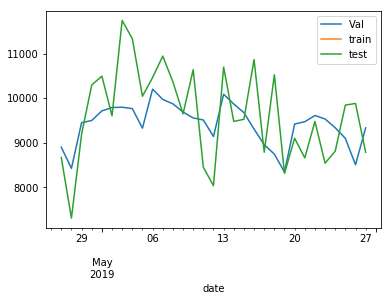

In [99]:
df.plot()